In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')
data.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[]
1,2,2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[]
2,3,3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[]
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]"
4,5,5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[]


In [0]:
#sns.pairplot(data, hue='gender', size=2.5);

#grid = sns.FacetGrid(data, row="gender", col="diagnosed_date", margin_titles=True)



pandas.core.series.Series

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x432 with 0 Axes>

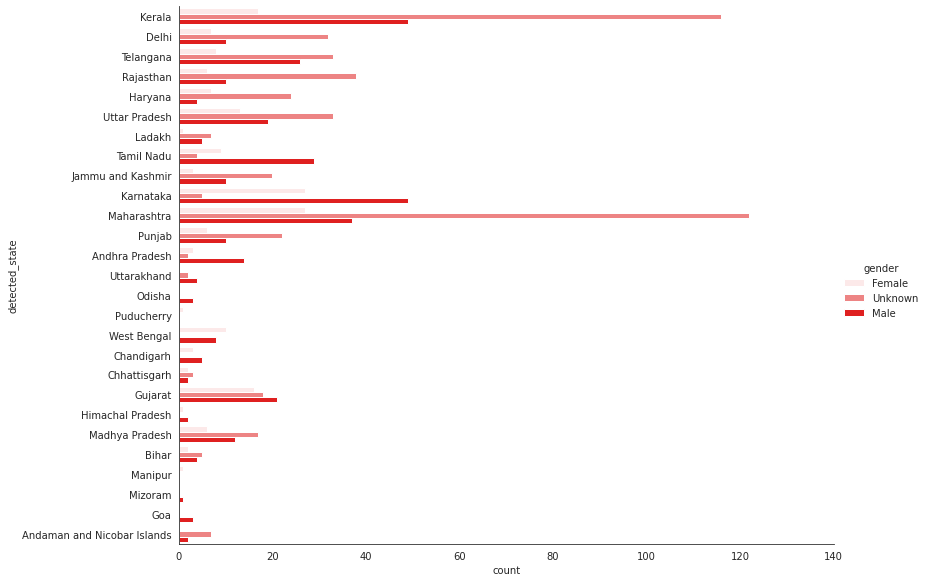

<Figure size 1152x432 with 0 Axes>

In [0]:
with sns.axes_style('white'):
    g = sns.factorplot(y ="detected_state", data=data, aspect=1.5,
                       kind="count", color='red', height=8, hue='gender')
    g.set_xticklabels(step=1)
plt.figure(figsize=(16,6))


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from datetime import date
data['diagnosed_date'] = pd.to_datetime(data['diagnosed_date']).dt.strftime("%Y%m%d")
data['status_change_date'] = pd.to_datetime(data['status_change_date']).dt.strftime("%Y%m%d")
x = (data['diagnosed_date'])
x
y = (data['status_change_date'])
#data['Difference'] = x.sub(y, axis=0)


In [0]:
age = data.loc[(data.age >= 91.0) & (data.age<=100.0), ['id']]
age.count()

id    1
dtype: int64

0 - 10  14 cases

11 - 20 44 cases 

21 - 30 129 cases

31 - 40 94 cases

41 - 50 66 cases

51 - 60 74 cases

61 - 70 58 cases

71 - 80 9 cases

81 - 90 4 cases

90 - 100 1 cases

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9c033bd30>],
      dtype=object)

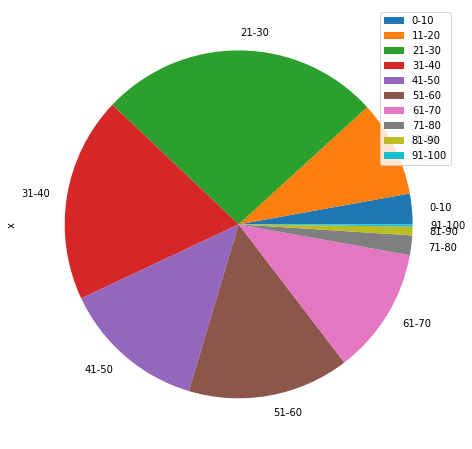

In [0]:
df = pd.DataFrame([14,44,129,94,66,74,58,9,4,1], index=['0-10', '11-20', '21-30', '31-40', '41-50'
, '51-60', '61-70', '71-80', '81-90', '91-100'], columns=['x'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))


**Covid19** **cases** **based** **on** **Age**




In [0]:
x = data.groupby('current_status').count()
first =data.loc[data.current_status=='Deceased',['id']]
y = first.count()
y

id    18
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9c03916a0>],
      dtype=object)

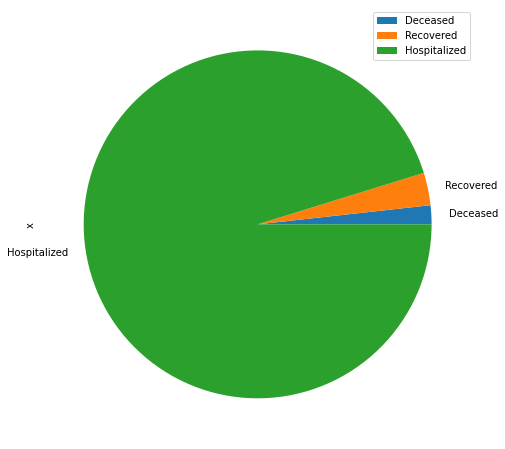

In [0]:
Male = (data['current_status'] == 'Deceased') & (data['gender'] == 'Female')
Male = len(data.loc[Male])
Male


df = pd.DataFrame([18,31,975], index=['Deceased', 'Recovered', 'Hospitalized'], columns=['x'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))


**Deceased** - **18** Male - 14 Female - 4

**Recovered** - **31**.  Male - 17 Female - 7

**Hospitalized** - **975** Male - 308 Female - 165



In [0]:
School = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-08') 
School = len(data.loc[School])
Public = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12')
Public = len(data.loc[Public])
WFH = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15')
WFH = len(data.loc[WFH])
Lockdown = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-28') 
Lockdown = len(data.loc[Lockdown])



In [0]:
CaseCount = [School,Public,WFH,Lockdown]



In [0]:
labels = ['schools shutdown','public places shutdown',
            'work from home started','country under lockdown']
dates = ['2020-03-09','2020-03-13','2020-03-15','2020-03-28']

In [0]:
plot = pd.DataFrame({'dates':dates,'Labels': labels, 'CaseCount': CaseCount})
plot

,dates,Labels,CaseCount
0,2020-03-09,schools shutdown,38
1,2020-03-13,public places shutdown,81
2,2020-03-15,work from home started,112
3,2020-03-28,country under lockdown,1024


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


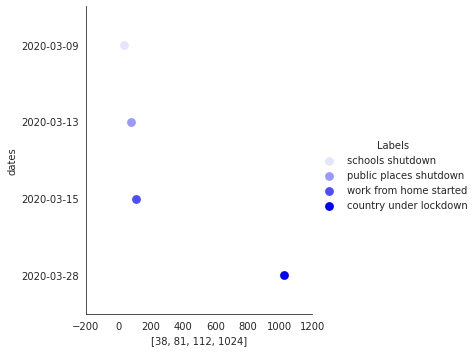

In [0]:
with sns.axes_style('white'):
    g = sns.factorplot(y ="dates", x = CaseCount, data=plot, aspect=1, color='blue', height=5, hue='Labels')
    g.set_xticklabels(step=1)


In [0]:
data['diagnosed_date'] = pd.to_datetime(data['diagnosed_date'])
data['status_change_date'] = pd.to_datetime(data['status_change_date'])
data['days'] = data['diagnosed_date'] - data['status_change_date']


,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts,days
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[],-15 days
1,2,2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[],-12 days
2,3,3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[],-11 days
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]",-13 days
4,5,5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[],0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,1021,NaN,2020-03-28,NaN,Unknown,NaN,SRID=4326;POINT (80.859666 27.1303344),Meerut,Uttar Pradesh,NaN,Hospitalized,2020-03-28,Brother-in-law of P983,NaN,SRID=4326;POINT (80.859666 27.1303344),[983],0 days
1021,1022,1022,NaN,2020-03-28,NaN,Unknown,NaN,SRID=4326;POINT (85.906508 25.6440845),NaN,Bihar,NaN,Hospitalized,2020-03-28,Details awaited,NaN,SRID=4326;POINT (85.906508 25.6440845),[],0 days
1022,1023,1023,NaN,2020-03-28,NaN,Unknown,NaN,SRID=4326;POINT (85.906508 25.6440845),NaN,Bihar,NaN,Hospitalized,2020-03-28,Details awaited,NaN,SRID=4326;POINT (85.906508 25.6440845),[],0 days
1023,1024,1025,NaN,2020-03-28,21.0,Male,Ambala,SRID=4326;POINT (76.770421 30.3843674),Ambala,Haryana,NaN,Hospitalized,2020-03-28,"resident of Ram Nagar village in Patiala, Punj...",NaN,SRID=4326;POINT (76.770421 30.3843674),[],0 days


In [0]:
Male = (data['current_status'] == 'Recovered')
first = (data.loc[Male])


**Average number of days to recover is 13 days**